In [1]:
import math
import pandas as pd
from numpy import arange

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['font.size']=14

In [3]:
train = pd.read_csv('/Users/michaeltwardos/Desktop/GA Decision Trees/leads.csv')
train

,customer,a,b,c,converted
0,A,1,1,1,1
1,B,0,0,1,1
2,C,1,1,0,1
3,D,0,1,1,1
4,E,0,1,1,1
5,F,1,1,0,1
6,G,0,1,1,1
7,H,1,1,1,1
8,I,0,1,1,1
9,J,0,1,0,1


In [5]:
#Computes fraction of the list that has the val.
def prob(lst, val):
    L = len(lst)
    if L > 0:
        p = round(float(len(lst[lst==val]))/L, 3)
    else:
        p = 0
    return p

#Determines the Entropy Contribution from a given probability
def entropyContribution(p):
    if p != 0:
        return round(-p*math.log(p, 2), 3)
    else:
        return 0
    
#Computes the entropy given a binary probability - 1 or 0
def binaryEntropy(p):
    S = entropyContribution(p) + entropyContribution(1-p)
    return S

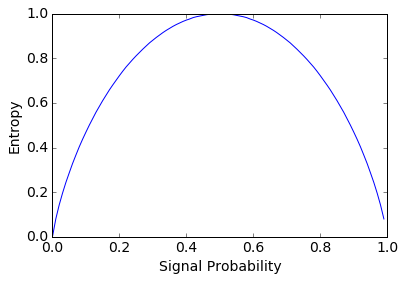

In [6]:
xData=[]
yData=[]
for i in arange(0,1, 0.01):
    yData.append(binaryEntropy(i))
    xData.append(i)
    
plt.plot(xData, yData)
plt.ylabel('Entropy')
plt.xlabel('Signal Probability')
plt.show()

In [7]:
#The probability that a lead from the training set converts
prob(train.converted, 1)

0.462

In [8]:
#Compute the overall entropy of the signal
print binaryEntropy(prob(train.converted, 1))

0.996


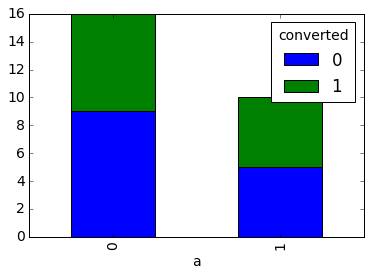

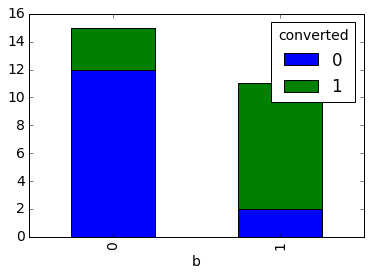

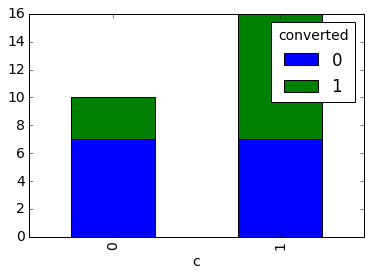

In [9]:
#Try to visualize information gained by segmenting by lead features
[train.groupby(['a', 'converted'])['converted'].count().\
 unstack('converted').plot(kind='bar', stacked=True),
 train.groupby(['b', 'converted'])['converted'].count().\
 unstack('converted').plot(kind='bar', stacked=True),
 train.groupby(['c', 'converted'])['converted'].count().\
 unstack('converted').plot(kind='bar', stacked=True)]

In [10]:
#Compute the entropy of each branch of the c split
print binaryEntropy(prob(train[train.c==0].converted, 1))
print binaryEntropy(prob(train[train.c==1].converted, 1))

0.881
0.989


In [11]:
#Compute the Absolute Conditional Entropy from using a
print 'a'
print prob(train.a, 1)*binaryEntropy(prob(train[train.a==1].converted, 1)) + \
      prob(train.a, 0)*binaryEntropy(prob(train[train.a==0].converted, 1))

#Compute the Absolute Conditional Entropy from using b
print 'b'
print prob(train.b, 1)*binaryEntropy(prob(train[train.b==1].converted, 1)) + \
      prob(train.b, 0)*binaryEntropy(prob(train[train.b==0].converted, 1))

#Compute the Absolute Conditional Entropy from using c
print 'c' 
print prob(train.c, 1)*binaryEntropy(prob(train[train.c==1].converted, 1)) + \
      prob(train.c, 0)*binaryEntropy(prob(train[train.c==0].converted, 1))


a
0.993235
b
0.705926
c
0.94742


In [12]:
from sklearn.tree import DecisionTreeClassifier
classify=DecisionTreeClassifier(random_state=1)

In [13]:
feature_cols=['a', 'b', 'c']
X=train[feature_cols]
y=train.converted
classify.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [14]:
classify.feature_importances_

array([ 0.06572503,  0.76708693,  0.16718804])

In [ ]:
classify.predict([[0,1,0]])[0]